# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Ahmad Rizhan]
- **Email:** [rizhan25@gmail.com]
- **ID Dicoding:** [ahmad_rizhan]

## Menentukan Pertanyaan Bisnis

- Musim apa yang memiliki rata-rata penyewaan sepeda tertinggi dan terendah selama periode 2011–2012, serta bagaimana implikasinya terhadap strategi operasional layanan penyewaan?
- Bagaimana perbedaan rata-rata jumlah penyewaan sepeda berdasarkan kondisi cuaca selama periode 2011–2012, dan kondisi mana yang perlu diantisipasi dalam perencanaan kapasitas layanan?

## Import Semua Packages/Library yang Digunakan

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

## Data Wrangling

### Gathering Data

In [62]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [63]:
df.shape

(731, 16)

**Insight:**
- Dataset memiliki 731 baris dan 16 Kolom
- Dataset ini berisi informasi tentang jumlah penyewaan sepeda per hari selama periode tertentu
- Beberapa kolom yang terlihat penting untuk analisis antara lain season, weathersit, dan cnt, di mana kolom cnt menunjukkan total penyewaan sepeda dalam satu hari.

### Assessing Data

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [65]:
df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**Insight:**
- Berdasarkan hasil pengecekan, seluruh kolom memiliki jumlah data yang sama yaitu 731 baris, sehingga tidak ditemukan adanya missing value pada dataset ini.
- Struktur data sudah cukup rapi dan tidak terlihat adanya ketidaksesuaian jumlah data antar kolom.
- Kolom dteday masih bertipe object, sehingga nantinya bisa dipertimbangkan untuk diubah ke format datetime agar lebih mudah dianalisis berdasarkan waktu.
- Beberapa kolom seperti season dan weathersit masih berupa angka kategori, sehingga perlu diubah menjadi label yang lebih deskriptif agar hasil analisis dan visualisasi lebih mudah dipahami.

In [66]:
df.duplicated().sum()

np.int64(0)

Insight:

- Hasil pemeriksaan menunjukkan bahwa tidak terdapat data duplikat pada dataset ini.
- Seluruh data tercatat secara unik untuk setiap hari, sehingga tidak diperlukan penghapusan data duplikat.
- Secara umum, kualitas data sudah cukup baik dan siap untuk masuk ke tahap pembersihan dan analisis lebih lanjut.


### Cleaning Data

In [67]:
df['dteday'] = pd.to_datetime(df['dteday'])

In [68]:
season_map = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

weather_map = {
    1: 'Clear',
    2: 'Mist',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain'
}

df['season'] = df['season'].map(season_map)
df['weathersit'] = df['weathersit'].map(weather_map)

In [69]:
df[['season','weathersit']].head()

,season,weathersit
0,Spring,Mist
1,Spring,Mist
2,Spring,Clear
3,Spring,Clear
4,Spring,Clear


**Insight:**
- Pada tahap pembersihan data, kolom dteday telah diubah ke format datetime agar lebih mudah dianalisis berdasarkan waktu.
- Kolom season dan weathersit yang sebelumnya berupa kode angka telah dikonversi menjadi label kategori yang lebih deskriptif seperti Spring, Summer, Clear, dan Mist.
- Perubahan ini bertujuan agar proses analisis dan visualisasi menjadi lebih mudah dipahami.

## Exploratory Data Analysis (EDA)

### Explore ...

### 1. EDA Numerical
Analisis deskriptif untuk variabel numerik seperti cnt, temp, hum, dan windspeed.

In [70]:
df[['cnt', 'temp', 'hum', 'windspeed']].describe()

,cnt,temp,hum,windspeed
count,731.000000,731.000000,731.000000,731.000000
mean,4504.348837,0.495385,0.627894,0.190486
std,1937.211452,0.183051,0.142429,0.077498
min,22.000000,0.059130,0.000000,0.022392
25%,3152.000000,0.337083,0.520000,0.134950
50%,4548.000000,0.498333,0.626667,0.180975
75%,5956.000000,0.655417,0.730209,0.233214
max,8714.000000,0.861667,0.972500,0.507463


**Insight EDA Numerical:**
- Rata-rata jumlah penyewaan sepeda (cnt) adalah sekitar 4.504 unit per hari, dengan nilai maksimum mencapai 8.714 dan minimum 22. Hal ini menunjukkan adanya variasi yang cukup besar dalam jumlah penyewaan.
- Standar deviasi cnt yang cukup tinggi (±1.937) mengindikasikan fluktuasi permintaan yang signifikan antar hari.
- Variabel suhu (temp) memiliki rata-rata sekitar 0,49 (dalam skala normalisasi), dengan rentang antara 0,05 hingga 0,86.
- Kelembapan (hum) cenderung berada pada kisaran menengah hingga tinggi, dengan rata-rata sekitar 0,62.
- Kecepatan angin (windspeed) memiliki variasi yang relatif kecil dibandingkan variabel lainnya.

### 2. EDA Univariate
Analisis distribusi variabel utama untuk melihat pola sebaran dan potensi outlier.

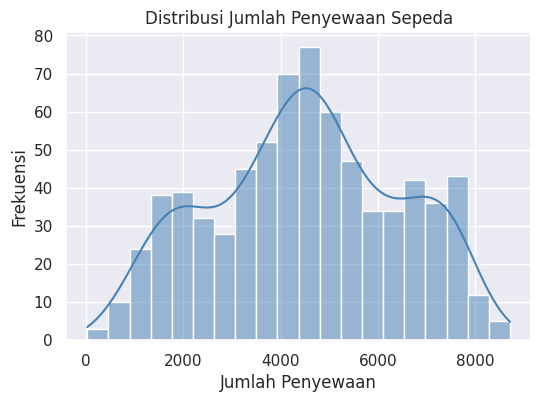

In [71]:
plt.figure(figsize=(6,4))
sns.histplot(df['cnt'], bins=20, kde=True, color='steelblue')
plt.title('Distribusi Jumlah Penyewaan Sepeda')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.show()

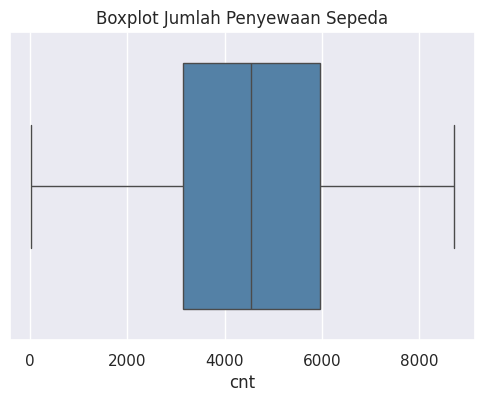

In [72]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['cnt'], color='steelblue')
plt.title('Boxplot Jumlah Penyewaan Sepeda')
plt.show()

**Insight EDA Univariate:**
- Distribusi jumlah penyewaan menunjukkan pola yang relatif menyebar dengan konsentrasi pada rentang menengah.
- Terdapat variasi yang cukup besar antara nilai minimum dan maksimum, yang mengindikasikan fluktuasi permintaan harian.
- Boxplot menunjukkan adanya beberapa nilai ekstrem (outlier), terutama pada nilai penyewaan yang sangat rendah maupun sangat tinggi.

### 3. EDA Kategorikal
Analisis distribusi dan frekuensi variabel kategorikal seperti season dan weathersit untuk melihat proporsi kemunculan masing-masing kategori.

In [73]:
df['season'].value_counts()

,count
season,
Fall,188
Summer,184
Spring,181
Winter,178


In [74]:
df['season'].value_counts(normalize=True) * 100

,proportion
season,
Fall,25.718194
Summer,25.170999
Spring,24.760602
Winter,24.350205


In [75]:
df['weathersit'].value_counts()

,count
weathersit,
Clear,463
Mist,247
Light Snow/Rain,21


In [76]:
df['weathersit'].value_counts(normalize=True) * 100

,proportion
weathersit,
Clear,63.337893
Mist,33.789330
Light Snow/Rain,2.872777


**Insight EDA Kategorikal:**
- Distribusi musim relatif seimbang, menunjukkan bahwa data mencakup seluruh musim secara proporsional.
- Kondisi cuaca paling sering terjadi adalah kondisi cerah (Clear), sedangkan kondisi hujan atau salju lebih jarang terjadi.
- Distribusi ini penting karena frekuensi kemunculan kategori dapat memengaruhi rata-rata penyewaan pada masing-masing kondisi.

### 4. EDA Multivariate
Analisis hubungan antar variabel numerik untuk melihat kekuatan dan arah korelasi, khususnya terhadap jumlah penyewaan sepeda (cnt).

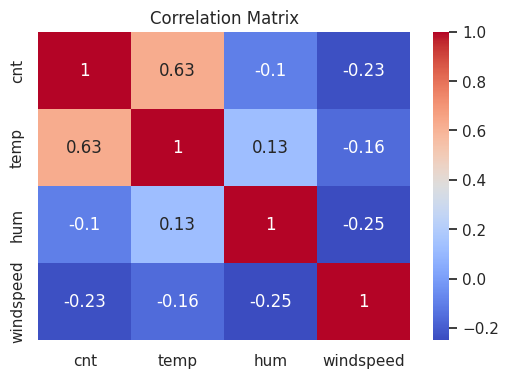

In [77]:
corr = df[['cnt','temp','hum','windspeed']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Insight EDA Multivariate:**
- Variabel suhu (temp) menunjukkan korelasi positif terhadap jumlah penyewaan sepeda (cnt), yang berarti semakin tinggi suhu, semakin tinggi kecenderungan penyewaan.
- Kelembapan (hum) menunjukkan korelasi negatif terhadap jumlah penyewaan, mengindikasikan bahwa tingkat kelembapan yang tinggi dapat menurunkan minat penyewaan.
- Kecepatan angin (windspeed) memiliki korelasi yang relatif lemah terhadap jumlah penyewaan.
- Hasil ini mendukung temuan sebelumnya bahwa faktor lingkungan memiliki peran dalam memengaruhi permintaan layanan.

In [78]:
df.groupby('season')['cnt'].mean()

,cnt
season,
Fall,5644.303191
Spring,2604.132597
Summer,4992.331522
Winter,4728.162921


### **Insight:**
- Rata-rata jumlah penyewaan sepeda tertinggi terjadi pada musim Fall.
- Musim Spring memiliki rata-rata penyewaan paling rendah dibandingkan musim lainnya.
- Musim Summer dan Winter menunjukkan jumlah penyewaan yang cukup tinggi, meskipun masih berada di bawah musim Fall.
- Hal ini menunjukkan bahwa faktor musim memiliki pengaruh terhadap tingkat penggunaan sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

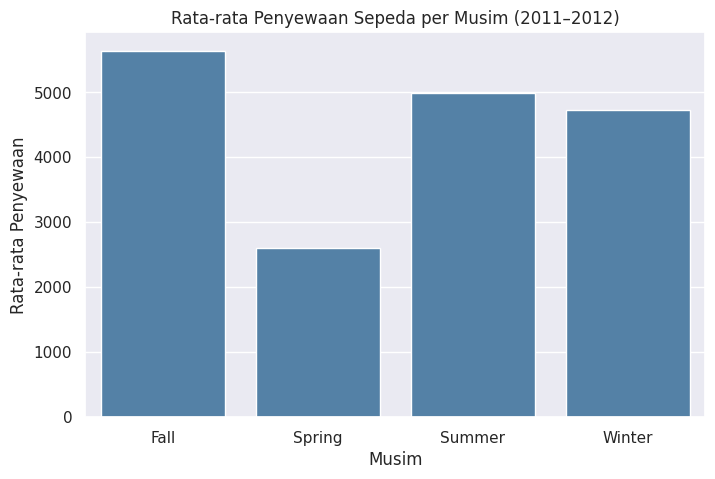

In [79]:
season_avg = df.groupby('season')['cnt'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=season_avg, x='season', y='cnt', color='steelblue')
plt.title('Rata-rata Penyewaan Sepeda per Musim (2011–2012)')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Penyewaan')
plt.show()

**Insight:**

- Berdasarkan data periode 2011–2012, musim Fall memiliki rata-rata penyewaan sepeda tertinggi dibandingkan musim lainnya.
- Musim Spring menunjukkan rata-rata penyewaan terendah selama periode yang sama.
- Perbedaan ini mengindikasikan adanya pola musiman yang konsisten dalam memengaruhi tingkat permintaan sepeda.
- Perusahaan perlu meningkatkan kesiapan operasional pada musim Fall, seperti menambah ketersediaan unit sepeda dan memastikan sistem perawatan berjalan optimal untuk menghindari kekurangan kapasitas.
- Pada musim Spring, perusahaan dapat mempertimbangkan strategi promosi atau penyesuaian kapasitas operasional guna menjaga efisiensi dan tingkat utilisasi sepeda.

### Pertanyaan 2:

In [80]:
weather_avg = df.groupby('weathersit')['cnt'].mean().reset_index()
weather_avg

,weathersit,cnt
0,Clear,4876.786177
1,Light Snow/Rain,1803.285714
2,Mist,4035.862348


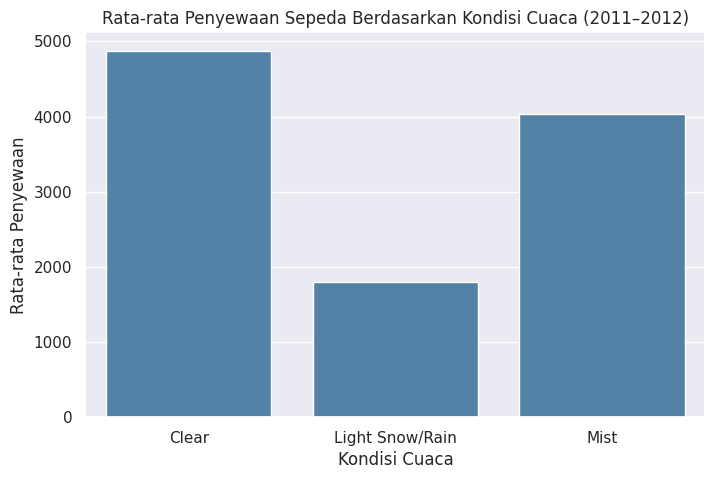

In [81]:
plt.figure(figsize=(8,5))
sns.barplot(data=weather_avg, x='weathersit', y='cnt', color='steelblue')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca (2011–2012)')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Penyewaan')
plt.show()

**Insight:**

- Berdasarkan data periode 2011–2012, kondisi cuaca Clear memiliki rata-rata penyewaan sepeda tertinggi dibandingkan kondisi lainnya.
- Pada kondisi Mist, jumlah penyewaan masih relatif tinggi, namun tetap lebih rendah dibandingkan kondisi cerah.
- Kondisi Light Snow/Rain menunjukkan penurunan yang signifikan dalam jumlah penyewaan sepeda.
- Pola ini menunjukkan bahwa kondisi cuaca memiliki pengaruh yang cukup kuat terhadap tingkat permintaan layanan penyewaan sepeda.
- Perusahaan perlu meningkatkan ketersediaan sepeda dan kesiapan operasional pada hari dengan cuaca cerah untuk menghindari kekurangan kapasitas.
- Sebaliknya, pada kondisi cuaca kurang mendukung, perusahaan dapat menyesuaikan kapasitas operasional atau menerapkan strategi promosi untuk menjaga tingkat utilisasi sepeda

## Analisis Lanjutan (Opsional)

In [82]:
yearly_avg = df.groupby('yr')['cnt'].mean().reset_index()

yearly_avg

,yr,cnt
0,0,3405.761644
1,1,5599.934426


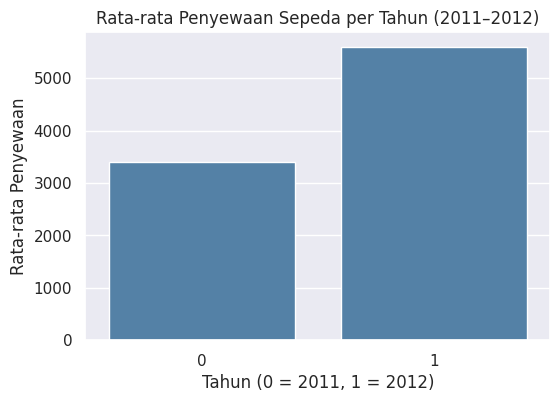

In [83]:
plt.figure(figsize=(6,4))
sns.barplot(data=yearly_avg, x='yr', y='cnt', color='steelblue')
plt.title('Rata-rata Penyewaan Sepeda per Tahun (2011–2012)')
plt.xlabel('Tahun (0 = 2011, 1 = 2012)')
plt.ylabel('Rata-rata Penyewaan')
plt.show()

**Insight:**
- Berdasarkan data periode 2011–2012, terdapat perbedaan rata-rata penyewaan sepeda antara kedua tahun tersebut.
- Tahun 2012 menunjukkan rata-rata penyewaan yang lebih tinggi dibandingkan tahun 2011.
- Hal ini mengindikasikan adanya pertumbuhan penggunaan layanan penyewaan sepeda dari tahun ke tahun.
- Peningkatan ini dapat menjadi dasar bagi perusahaan untuk merencanakan ekspansi kapasitas layanan, seperti penambahan unit sepeda atau perluasan area operasional pada periode berikutnya.

In [84]:
# Membuat kategori suhu menggunakan teknik binning
df['temp_category'] = pd.cut(
    df['temp'],
    bins=3,
    labels=['Low', 'Medium', 'High']
)

df[['temp', 'temp_category']].head()

,temp,temp_category
0,0.344167,Medium
1,0.363478,Medium
2,0.196364,Low
3,0.200000,Low
4,0.226957,Low


In [85]:
temp_avg = df.groupby('temp_category')['cnt'].mean().reset_index()

temp_avg

/tmp/ipython-input-3948494178.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_avg = df.groupby('temp_category')['cnt'].mean().reset_index()


,temp_category,cnt
0,Low,2569.005882
1,Medium,4599.000000
2,High,5644.109848


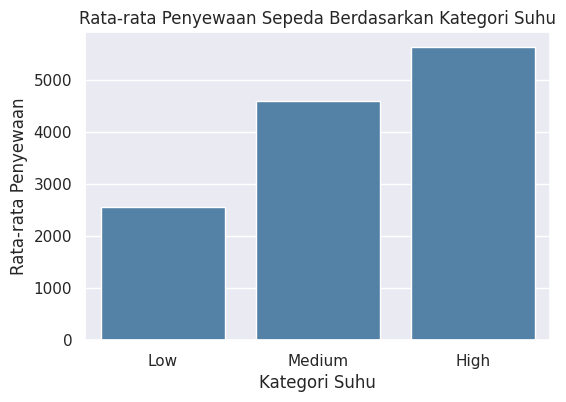

In [86]:
plt.figure(figsize=(6,4))
sns.barplot(data=temp_avg, x='temp_category', y='cnt', color='steelblue')

plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Kategori Suhu')
plt.xlabel('Kategori Suhu')
plt.ylabel('Rata-rata Penyewaan')
plt.show()

**Insight:**
- Rata-rata penyewaan sepeda meningkat seiring dengan kenaikan kategori suhu.
- Kategori suhu High menunjukkan rata-rata penyewaan tertinggi dibandingkan kategori lainnya.
- Pada suhu Low, jumlah penyewaan menurun cukup signifikan dibandingkan kategori Medium dan High.
- Hal ini menunjukkan bahwa suhu memiliki pengaruh positif terhadap tingkat penggunaan sepeda.
- Perusahaan dapat mengantisipasi peningkatan permintaan pada periode dengan suhu tinggi dengan menambah unit sepeda dan memastikan kesiapan operasional.

## Conclusion

- Berdasarkan analisis periode 2011–2012, musim Fall memiliki rata-rata penyewaan sepeda tertinggi, sedangkan Spring menunjukkan rata-rata terendah. Hal ini menunjukkan adanya pola musiman yang signifikan dalam permintaan layanan penyewaan sepeda.
- Kondisi cuaca terbukti memengaruhi jumlah penyewaan. Cuaca cerah (Clear) menghasilkan rata-rata penyewaan tertinggi, sementara kondisi Light Snow/Rain menyebabkan penurunan permintaan yang cukup drastis.
- Analisis lanjutan menggunakan teknik binning pada variabel suhu menunjukkan bahwa semakin tinggi kategori suhu, semakin tinggi pula rata-rata jumlah penyewaan sepeda. Ini mengindikasikan bahwa suhu memiliki hubungan positif terhadap tingkat penggunaan sepeda.
- Secara keseluruhan, faktor lingkungan seperti musim, kondisi cuaca, dan suhu merupakan determinan utama dalam variasi permintaan layanan penyewaan sepeda.
- Dari perspektif bisnis, perusahaan disarankan untuk:
  1. Meningkatkan kapasitas dan kesiapan operasional pada musim Fall dan saat suhu tinggi.
  2. Mengoptimalkan strategi promosi atau efisiensi operasional pada musim Spring dan kondisi cuaca buruk.
  3. Menggunakan pola musiman ini sebagai dasar perencanaan distribusi armada dan manajemen perawatan sepeda.